In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
pd.options.display.float_format = "{:.3f}".format
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgelsd")

In [252]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
df = pd.read_csv(data_path, header=4)

In [253]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [254]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [255]:
def murder(c):
    if c["Murder and\nnonnegligent\nmanslaughter"] > 0:
        return 1
    elif c["Murder and\nnonnegligent\nmanslaughter"] == 0:
        return 0
    

In [256]:
df["murder"] = df.apply(murder, axis=1)

In [257]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [258]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [259]:
df["Population"].head()

0     1,861
1     2,577
2     2,846
3    97,956
4     6,388
Name: Population, dtype: object

In [260]:
df["Population"] = df["Population"].str.replace(",", "")

In [261]:
s = "1,861"
s = s.replace(",", "")
print(s)

1861


In [262]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861,0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,2577,3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,2846,3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,97956,791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,6388,23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [263]:
df["Population"] = pd.to_numeric(df["Population"])

In [264]:
df["Robbery"] = df["Robbery"].str.replace(",", "")

In [265]:
df["Robbery"] = pd.to_numeric(df["Robbery"])

In [266]:
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",", "")

df["Property\ncrime"] = pd.to_numeric(df["Property\ncrime"])

In [267]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [268]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000


In [269]:
df["Pop_Squared"] = df["Population"] ** 2

In [270]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000,6640929.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000,8099716.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000,40806544.000


In [271]:
def robbery(c):
    if c["Robbery"] > 0:
        return 1
    elif c["Robbery"] == 0:
        return 0
    
df["robbery"] = df.apply(robbery, axis=1)
    

In [272]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000,3463321.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000,6640929.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000,8099716.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000,40806544.000,1.000


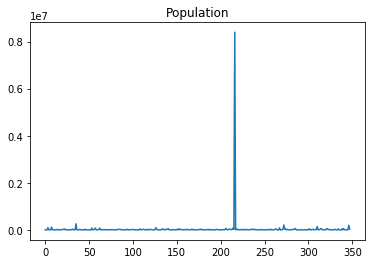

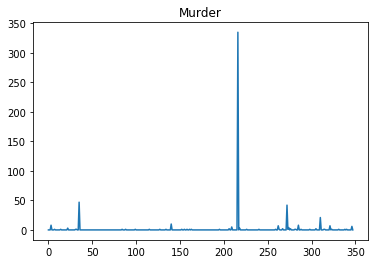

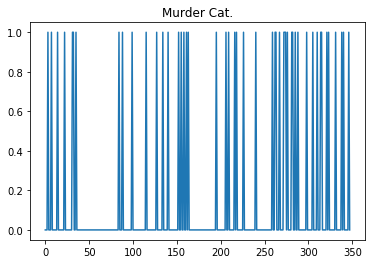

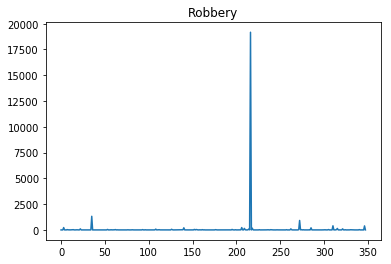

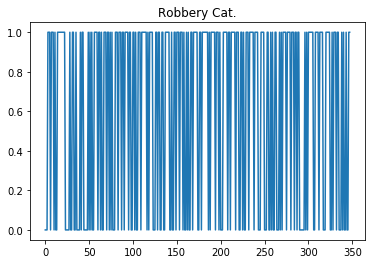

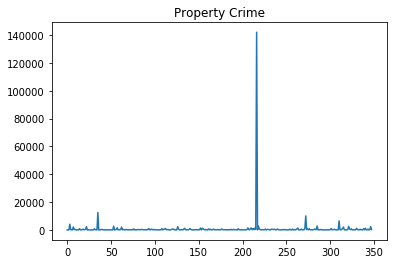

In [273]:

plt.plot(df["Population"])
plt.title("Population")
plt.show()

plt.plot(df["Murder and\nnonnegligent\nmanslaughter"])
plt.title("Murder")
plt.show()
          
plt.plot(df["murder"])
plt.title("Murder Cat.")
plt.show()

plt.plot(df["Robbery"])
plt.title("Robbery")
plt.show()

plt.plot(df["robbery"])
plt.title("Robbery Cat.")
plt.show()

plt.plot(df["Property\ncrime"])
plt.title("Property Crime")
plt.show()

In [274]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,132.000,1.000,70494931807876.000,1.000


In [275]:
df[df["Robbery"] > 100]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57,nan,1.000,2144060416.000,1.000
35,Buffalo,258789.000,"3,249",47.000,nan,145,1322.000,"1,735",12491.000,"3,458","8,076",957,nan,1.000,66971746521.000,1.000
140,Hempstead Village,55198.000,433,10.000,nan,3,204.000,216,958.000,206,630,122,2.000,1.000,3046819204.000,1.000
206,Mount Vernon,68071.000,554,2.000,nan,7,228.000,317,1436.000,317,972,147,nan,1.000,4633661041.000,1.000
209,Newburgh,28571.000,435,5.000,nan,21,150.000,259,1040.000,304,673,63,15.000,1.000,816302041.000,1.000
216,New York,8396126.000,"52,384",335.000,nan,"1,112",19170.000,"31,767",141971.000,"16,606","117,931","7,434",nan,1.000,70494931807876.000,1.000
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112,22.000,1.000,2457581476.000,1.000
272,Rochester,210562.000,"2,107",42.000,nan,92,918.000,"1,055",10051.000,"2,587","6,855",609,132.000,1.000,44336355844.000,1.000
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153,nan,1.000,4361413681.000,1.000


In [276]:
features = df[["Population", "Pop_Squared", "murder", "robbery", "Property\ncrime"]]

In [277]:
features.head()

,Population,Pop_Squared,murder,robbery,Property crime
0,1861.000,3463321.000,0.000,0.000,12.000
1,2577.000,6640929.000,0.000,0.000,24.000
2,2846.000,8099716.000,0.000,0.000,16.000
3,97956.000,9595377936.000,1.000,1.000,4090.000
4,6388.000,40806544.000,0.000,1.000,223.000


In [278]:
len(features["murder"])

351

In [279]:
print(len(features["murder"]) - features["murder"].count())
print(len(features["Population"]) - features["Population"].count())
print(len(features["robbery"]) - features["robbery"].count())

3
3
3


In [280]:
features.isnull().sum()

Population         3
Pop_Squared        3
murder             3
robbery            3
Property\ncrime    3
dtype: int64

In [281]:
features = features.dropna()

In [282]:
regr = linear_model.LinearRegression()
Y = features["Property\ncrime"].values.reshape(-1,1)
X = features[["Population", "Pop_Squared", "murder", "robbery"]]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [283]:
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
print("R-squared: ")
print(regr.score(X,Y))

Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]
Intercept: 
 [-109.57533562]
R-squared: 
0.9961247104988709


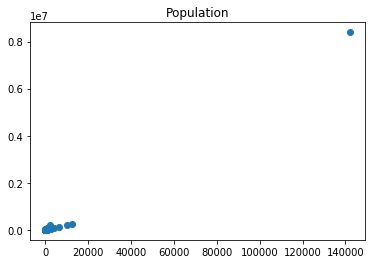

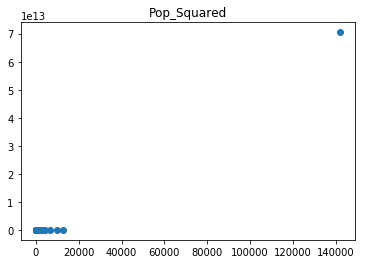

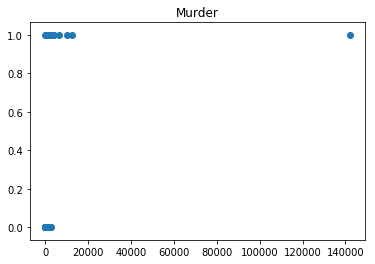

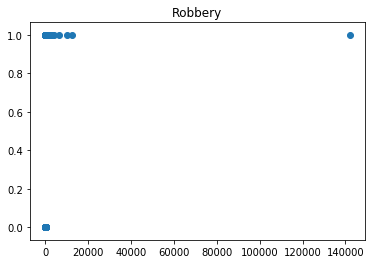

In [284]:
#exploring assumption #1: Linear Relationships

outcome = features["Property\ncrime"]

plt.scatter(outcome, features["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, features["Pop_Squared"])
plt.title("Pop_Squared")
plt.show()

plt.scatter(outcome, features["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, features["robbery"])
plt.title("Robbery")
plt.show()

#Conclusion: datapoint where the population is higher than 200,000 is an outlier 
#and is causing the data not to have a linear relationship

In [285]:
features["Population"].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population, dtype: float64

In [286]:
features[features["Population"] > 200000]

,Population,Pop_Squared,murder,robbery,Property crime
35,258789.000,66971746521.000,1.000,1.000,12491.000
216,8396126.000,70494931807876.000,1.000,1.000,141971.000
272,210562.000,44336355844.000,1.000,1.000,10051.000


In [287]:
features = features[features["Population"] < 200000]

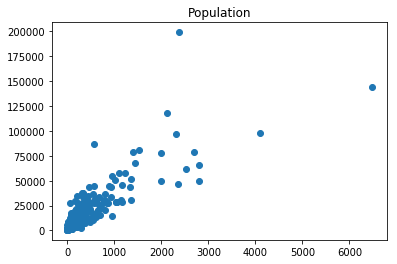

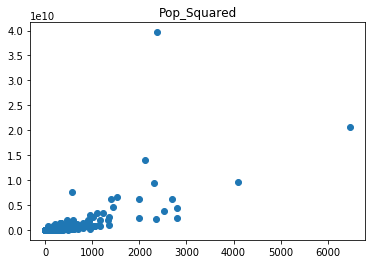

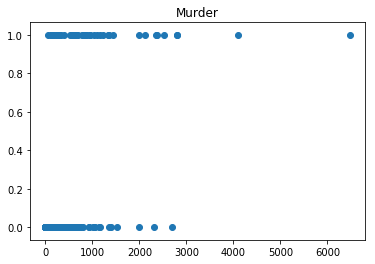

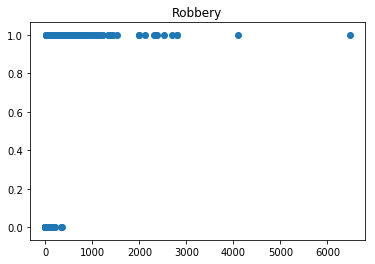

In [288]:
outcome = features["Property\ncrime"]

plt.scatter(outcome, features["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, features["Pop_Squared"])
plt.title("Pop_Squared")
plt.show()

plt.scatter(outcome, features["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, features["robbery"])
plt.title("Robbery")
plt.show()

#looking at the new scatter plots below, there is one outlier in the Population (at about 2500, 200000).
# The Pop_Squared data (unsurprisingly) is not linear (it's quadratic). However, if I try to address this by taking the square root of this feature,
# I am just left with the "Population" feature.

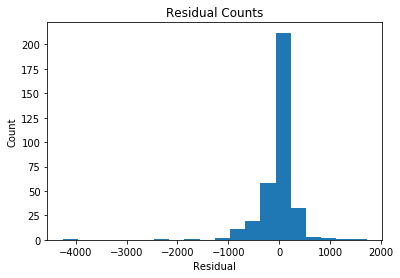

In [289]:
#exploring assumption #2: multivariate normality

X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

In [290]:
features["residual"] = residual
features["predicted"] = predicted

In [291]:
features[features["residual"] < -2000]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
267,87204.000,7604537616.000,1.000,1.000,567.000,-2248.511,2815.511
346,199134.000,39654349956.000,1.000,1.000,2368.000,-4259.013,6627.013


In [292]:
features[features["Population"] > 199000]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
346,199134.000,39654349956.000,1.000,1.000,2368.000,-4259.013,6627.013


In [293]:
features = features[features["Population"] < 199000]

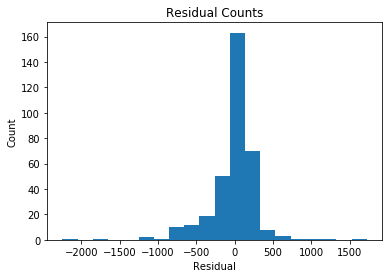

In [294]:
X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

In [295]:
features[(features["residual"] > 750) | (features["residual"] < -750)]

#there are still 14 datapoints that skew this distribution

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
3,97956.000,9595377936.000,1.000,1.000,4090.000,906.059,3183.941
7,118296.000,13993943616.000,1.000,1.000,2118.000,-1761.579,3879.579
22,46304.000,2144060416.000,1.000,1.000,2349.000,939.433,1409.567
45,34462.000,1187629444.000,0.000,0.000,198.000,-884.268,1082.268
57,80705.000,6513297025.000,0.000,1.000,1515.000,-1062.392,2577.392
126,96667.000,9344508889.000,0.000,1.000,2303.000,-821.611,3124.611
127,44787.000,2005875369.000,1.000,1.000,578.000,-779.284,1357.284
140,55198.000,3046819204.000,1.000,1.000,958.000,-757.900,1715.900
214,78800.000,6209440000.000,0.000,1.000,1391.000,-1121.012,2512.012
218,49574.000,2457581476.000,1.000,1.000,2807.000,1284.767,1522.233


In [296]:
features["residual"].describe()

count     344.000
mean       -7.646
std       326.901
min     -2248.511
25%       -89.045
50%        53.288
75%       125.644
max      1722.482
Name: residual, dtype: float64

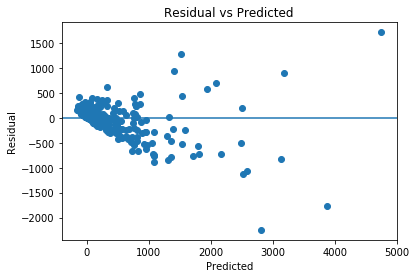

In [297]:
#exploring assumption #3: homoscedasticity
X = features[["Population", "Pop_Squared", "murder", "robbery"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

#the poorly estimated area is when the prediction 
#is higher than 2500

In [298]:
features[features["predicted"] > 2500]

,Population,Pop_Squared,murder,robbery,Property crime,residual,predicted
3,97956.000,9595377936.000,1.000,1.000,4090.000,906.059,3183.941
7,118296.000,13993943616.000,1.000,1.000,2118.000,-1761.579,3879.579
57,80705.000,6513297025.000,0.000,1.000,1515.000,-1062.392,2577.392
126,96667.000,9344508889.000,0.000,1.000,2303.000,-821.611,3124.611
214,78800.000,6209440000.000,0.000,1.000,1391.000,-1121.012,2512.012
267,87204.000,7604537616.000,1.000,1.000,567.000,-2248.511,2815.511
310,143834.000,20688219556.000,1.000,1.000,6473.000,1722.482,4750.518


In [299]:
df.iloc[[3,7, 57, 126, 214, 267, 310], :]

#pulling the full data for the datapoints where the predicted is greater than 2500

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32,3.000,1.000,13993943616.000,1.000
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28,nan,0.000,6513297025.000,1.000
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46,nan,0.000,9344508889.000,1.000
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69,nan,0.000,6209440000.000,1.000
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13,nan,1.000,7604537616.000,1.000
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394,57.000,1.000,20688219556.000,1.000


In [300]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,132.000,1.000,70494931807876.000,1.000


In [301]:
df["Motor\nvehicle\ntheft"].describe()

count     348
unique     51
top         0
freq       93
Name: Motor\nvehicle\ntheft, dtype: object

In [302]:
df["Motor\nvehicle\ntheft"] = df["Motor\nvehicle\ntheft"].str.replace(",", "")

df["Motor\nvehicle\ntheft"] = pd.to_numeric(df["Motor\nvehicle\ntheft"])

In [303]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,35.905,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,403.424,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,2.000,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,7.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,7434.000,132.000,1.000,70494931807876.000,1.000


In [304]:
df["arson"] = np.where(df["Arson3"] > 1, 1, 0)

In [305]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0


In [306]:
df["Car Theft"] = np.where(df["Motor\nvehicle\ntheft"] >= 10, 2, (10 > np.where(df["Motor\nvehicle\ntheft"] > 1, 1, 0)))

In [307]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,1
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,1
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,1
6,Allegany Village,1781.000,3,0.000,nan,0,0.000,3,10.000,0,10,0.000,0.000,0.000,3171961.000,0.000,0,1
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2
8,Amityville Village,9519.000,9,0.000,nan,2,4.000,3,210.000,16,188,6.000,1.000,0.000,90611361.000,1.000,0,1
9,Amsterdam,18182.000,30,0.000,nan,0,12.000,18,405.000,99,291,15.000,0.000,0.000,330585124.000,1.000,0,2


In [308]:
df["Car Theft"] = np.where(df["Motor\nvehicle\ntheft"] == 0, 0, df["Car Theft"])

In [311]:
df.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1
5,Alfred Village,4089.000,5,0.000,nan,0,3.000,2,46.000,10,36,0.000,nan,0.000,16719921.000,1.000,0,0
6,Allegany Village,1781.000,3,0.000,nan,0,0.000,3,10.000,0,10,0.000,0.000,0.000,3171961.000,0.000,0,0
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2
8,Amityville Village,9519.000,9,0.000,nan,2,4.000,3,210.000,16,188,6.000,1.000,0.000,90611361.000,1.000,0,1
9,Amsterdam,18182.000,30,0.000,nan,0,12.000,18,405.000,99,291,15.000,0.000,0.000,330585124.000,1.000,0,2


In [310]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
murder                                    float64
Pop_Squared                               float64
robbery                                   float64
arson                                       int32
Car Theft                                   int32
dtype: object

In [312]:
# After looking at the first 3 assumptions, I've decided features need to be added to help meet the assumptions. 
#I've added "car theft" as a 0, 1 (between 1-10), and 2 (greater than 10)
#I've added "arson" as a 0 or 1
#both of these crimes are related to property damage
#I'm removing pop_squared since that relationship is not linear and then it is repetitive when it's square rooted

#dropping the NaN and rows with a pop. over 199000

df = df[df["Population"] < 199000]




In [313]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1


In [314]:
regr = linear_model.LinearRegression()
Y = df["Property\ncrime"].values.reshape(-1,1)
X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]
regr.fit(X,Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [315]:
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
print("R-squared: ")
print(regr.score(X,Y))

Coefficients: 
 [[ 2.58818726e-02  1.32595426e+02 -1.12316533e+01 -7.08847502e+00
   1.56845002e+02]]
Intercept: 
 [-66.97514263]
R-squared: 
0.7557436704816607


### re-testing for the assumptions below

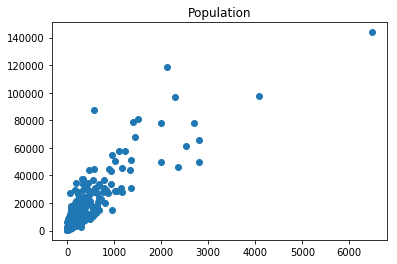

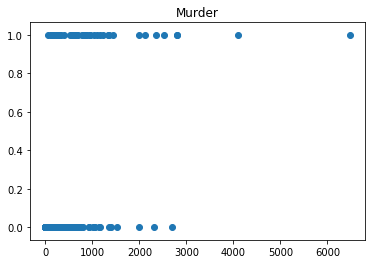

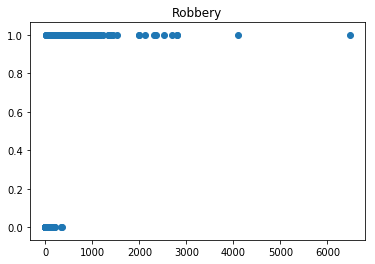

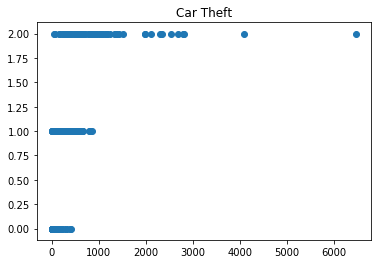

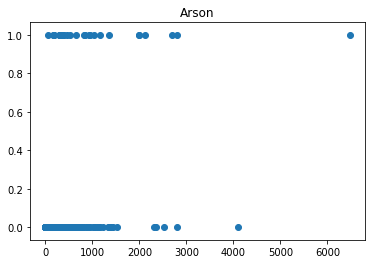

In [318]:
#assumption 1: linear relationships

outcome = df["Property\ncrime"]

plt.scatter(outcome, df["Population"])
plt.title("Population")
plt.show()

plt.scatter(outcome, df["murder"])
plt.title("Murder")
plt.show()

plt.scatter(outcome, df["robbery"])
plt.title("Robbery")
plt.show()

plt.scatter(outcome, df["Car Theft"])
plt.title("Car Theft")
plt.show()

plt.scatter(outcome, df["arson"])
plt.title("Arson")
plt.show()


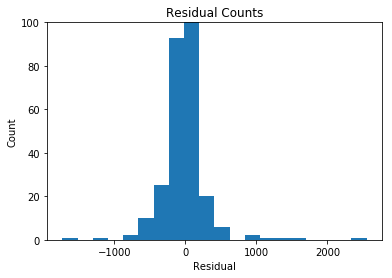

In [320]:
#assumption 2: multivariate normality

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = actual - predicted

plt.hist(residual, bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.ylim(0,100)
plt.show()

#there is still some non-normality outside of the 1000+/-

#what many of these residual outliers have in common is a high robbery score, so I am going to limit the scope of this 
#model to cities that have less than 100 robberies

In [321]:
df["Predicted"] = predicted
df["Residual"] = residual

In [322]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0.000,0.000,0.000,3463321.000,0.000,0,0,-18.809,30.809
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1.000,0.000,0.000,6640929.000,0.000,0,1,-7.366,31.366
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0.000,0.000,0.000,8099716.000,0.000,0,0,6.685,9.315
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5.000,nan,0.000,40806544.000,1.000,0,1,80.038,142.962


In [323]:
df[df["Residual"] > 1000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57.000,nan,1.000,2144060416.000,1.000,0,2,1238.646,1110.354
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112.000,22.000,1.000,2457581476.000,1.000,1,2,1480.125,1326.875
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153.000,nan,1.000,4361413681.000,1.000,0,2,1749.476,1050.524
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394.000,57.000,1.000,20688219556.000,1.000,1,2,3919.750,2553.250


In [324]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,344.000,344.000,0.000,344.000,344.000,344.000,185.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,14152.573,0.334,nan,10.378,316.703,9.474,1.124,0.131,555593819.666,0.596,0.084,0.916,316.703,-0.000
std,18876.821,1.560,nan,36.304,602.881,28.851,4.758,0.338,1784161632.486,0.491,0.278,0.671,524.106,297.958
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2983.250,0.000,nan,0.000,39.000,0.000,0.000,0.000,8899789.750,0.000,0.000,0.000,2.638,-97.232
50%,7106.000,0.000,nan,1.000,111.500,2.000,0.000,0.000,50495272.000,1.000,0.000,1.000,119.546,24.352
75%,17889.250,0.000,nan,5.000,334.750,7.000,1.000,0.000,320027178.250,1.000,0.000,1.000,425.987,68.681
max,143834.000,21.000,nan,400.000,6473.000,394.000,57.000,1.000,20688219556.000,1.000,1.000,2.000,3919.750,2553.250


In [325]:
df[df["Robbery"] > 100]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142.000,nan,1.000,9595377936.000,1.000,0,2,2575.496,1514.504
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,2349.000,525,"1,767",57.000,nan,1.000,2144060416.000,1.000,0,2,1238.646,1110.354
140,Hempstead Village,55198.000,433,10.000,nan,3,204.000,216,958.000,206,630,122.000,2.000,1.000,3046819204.000,1.000,1,2,1625.684,-667.684
206,Mount Vernon,68071.000,554,2.000,nan,7,228.000,317,1436.000,317,972,147.000,nan,1.000,4633661041.000,1.000,0,2,1802.017,-366.017
209,Newburgh,28571.000,435,5.000,nan,21,150.000,259,1040.000,304,673,63.000,15.000,1.000,816302041.000,1.000,1,2,936.528,103.472
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,2807.000,746,"1,949",112.000,22.000,1.000,2457581476.000,1.000,1,2,1480.125,1326.875
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,2800.000,769,"1,878",153.000,nan,1.000,4361413681.000,1.000,0,2,1749.476,1050.524
310,Syracuse,143834.000,"1,192",21.000,nan,75,400.000,696,6473.000,"1,781","4,298",394.000,57.000,1.000,20688219556.000,1.000,1,2,3919.750,2553.250
315,Troy,49898.000,371,1.000,nan,14,145.000,211,1985.000,593,"1,305",87.000,5.000,1.000,2489810404.000,1.000,1,2,1488.510,496.490
321,Utica,61686.000,361,7.000,nan,27,102.000,225,2528.000,449,"1,997",82.000,nan,1.000,3805162596.000,1.000,0,2,1636.761,891.239


In [326]:
df = df[df["Robbery"] <= 100]

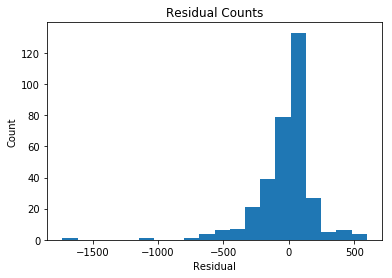

In [329]:
#testing the multivariate normality after removing high robbery

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]


plt.hist(df["Residual"], bins=20)
plt.title("Residual Counts")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()

#still need to address the residuals that are over 1000 in the negative direction
#not seeing a clean way to remove those two datapoints

In [330]:
df[df["Residual"] < -750]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2,3258.779,-1140.779
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,1.000,0,2,2297.214,-1730.214


In [331]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,334.000,334.000,0.000,334.000,334.000,334.000,180.000,334.000,334.000,334.000,334.000,334.000,334.000,334.000
mean,12578.898,0.141,nan,4.922,246.946,5.689,0.594,0.105,410436723.395,0.584,0.072,0.883,270.937,-23.991
std,15904.887,0.549,nan,11.363,365.751,10.428,1.397,0.307,1273358558.555,0.494,0.259,0.654,437.568,217.256
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2862.500,0.000,nan,0.000,38.250,0.000,0.000,0.000,8194723.000,0.000,0.000,0.000,-1.556,-98.285
50%,6840.500,0.000,nan,1.000,107.500,2.000,0.000,0.000,46794602.500,1.000,0.000,1.000,107.963,22.412
75%,15788.000,0.000,nan,4.000,314.500,6.000,1.000,0.000,249318076.000,1.000,0.000,1.000,388.662,62.837
max,118296.000,7.000,nan,100.000,2689.000,73.000,10.000,1.000,13993943616.000,1.000,1.000,2.000,3258.779,596.409


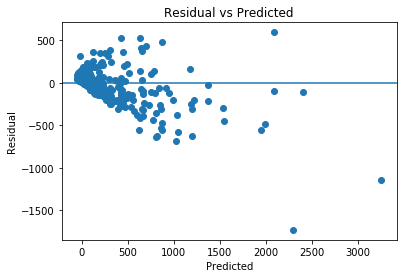

In [332]:
#assumption 3: homoscedasticity

X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]


plt.scatter(predicted, df["Residual"])
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

# the model appears to be less homoscedastic when the predicted value is greater than 1500
# all of these have high robbery, so I am going to adjust my feature to be a 0, 1, or 2

In [334]:
df[df["Predicted"] > 1500].sort_values("Residual")

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,1.000,0,2,2297.214,-1730.214
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,1.000,1,2,3258.779,-1140.779
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69.000,nan,0.000,6209440000.000,1.000,0,2,1947.108,-556.108
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28.000,nan,0.000,6513297025.000,1.000,0,2,1996.413,-481.413
314,Tonawanda Town,58082.000,118,1.000,nan,5,26.000,86,1099.000,190,882,27.000,1.000,1.000,3373518724.000,1.000,0,2,1543.483,-444.483
340,White Plains,57559.000,78,1.000,nan,3,28.000,46,1232.000,77,"1,134",21.000,nan,1.000,3313038481.000,1.000,0,2,1529.946,-297.946
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46.000,nan,0.000,9344508889.000,1.000,0,2,2409.539,-106.539
62,Colonie Town,78215.000,63,0.000,nan,0,31.000,32,1990.000,186,"1,753",51.000,10.000,0.000,6117586225.000,1.000,1,2,2088.812,-98.812
53,Cheektowaga Town,78361.000,158,0.000,nan,11,48.000,99,2689.000,345,"2,271",73.000,2.000,0.000,6140446321.000,1.000,1,2,2092.591,596.409


In [335]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
count,334.000,334.000,0.000,334.000,334.000,334.000,180.000,334.000,334.000,334.000,334.000,334.000,334.000,334.000
mean,12578.898,0.141,nan,4.922,246.946,5.689,0.594,0.105,410436723.395,0.584,0.072,0.883,270.937,-23.991
std,15904.887,0.549,nan,11.363,365.751,10.428,1.397,0.307,1273358558.555,0.494,0.259,0.654,437.568,217.256
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,276676.000,0.000,0.000,0.000,-53.361,-1730.214
25%,2862.500,0.000,nan,0.000,38.250,0.000,0.000,0.000,8194723.000,0.000,0.000,0.000,-1.556,-98.285
50%,6840.500,0.000,nan,1.000,107.500,2.000,0.000,0.000,46794602.500,1.000,0.000,1.000,107.963,22.412
75%,15788.000,0.000,nan,4.000,314.500,6.000,1.000,0.000,249318076.000,1.000,0.000,1.000,388.662,62.837
max,118296.000,7.000,nan,100.000,2689.000,73.000,10.000,1.000,13993943616.000,1.000,1.000,2.000,3258.779,596.409


In [338]:
df["robbery"] = np.where(df["Robbery"] > 8, 2, df["robbery"])



In [339]:
df[df["Predicted"] > 1500].sort_values("Residual")

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery,arson,Car Theft,Predicted,Residual
267,Ramapo Town,87204.000,57,2.000,nan,5,9.000,41,567.000,88,466,13.000,nan,1.000,7604537616.000,2.000,0,2,2297.214,-1730.214
7,Amherst Town,118296.000,107,1.000,nan,7,31.000,68,2118.000,204,"1,882",32.000,3.000,1.000,13993943616.000,2.000,1,2,3258.779,-1140.779
214,New Rochelle,78800.000,175,0.000,nan,5,81.000,89,1391.000,150,"1,172",69.000,nan,0.000,6209440000.000,2.000,0,2,1947.108,-556.108
57,Clarkstown Town,80705.000,65,0.000,nan,8,17.000,40,1515.000,99,"1,388",28.000,nan,0.000,6513297025.000,2.000,0,2,1996.413,-481.413
314,Tonawanda Town,58082.000,118,1.000,nan,5,26.000,86,1099.000,190,882,27.000,1.000,1.000,3373518724.000,2.000,0,2,1543.483,-444.483
340,White Plains,57559.000,78,1.000,nan,3,28.000,46,1232.000,77,"1,134",21.000,nan,1.000,3313038481.000,2.000,0,2,1529.946,-297.946
126,Greece Town,96667.000,151,0.000,nan,9,60.000,82,2303.000,332,"1,925",46.000,nan,0.000,9344508889.000,2.000,0,2,2409.539,-106.539
62,Colonie Town,78215.000,63,0.000,nan,0,31.000,32,1990.000,186,"1,753",51.000,10.000,0.000,6117586225.000,2.000,1,2,2088.812,-98.812
53,Cheektowaga Town,78361.000,158,0.000,nan,11,48.000,99,2689.000,345,"2,271",73.000,2.000,0.000,6140446321.000,2.000,1,2,2092.591,596.409


In [340]:
X = df[["Population", "murder", "robbery", "Car Theft", "arson"]]

predicted = regr.predict(X).ravel()
actual = features["Property\ncrime"]

residual = predicted - actual

plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title("Residual vs Predicted")
plt.show()

ValueError: operands could not be broadcast together with shapes (334,) (344,) 